In [1]:
import sys
import numpy as np 
import pandas as pd

In [2]:
df= pd.read_csv('../datasets/cardio_retrain.csv')

In [3]:
x= df.drop(['cardio'], axis=1)
y= df['cardio']



In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [5]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(x_train, y_train)
pred = model.predict(x_test)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, pred)
print(cm)

[[5430 1529]
 [2133 4908]]


<Axes: >

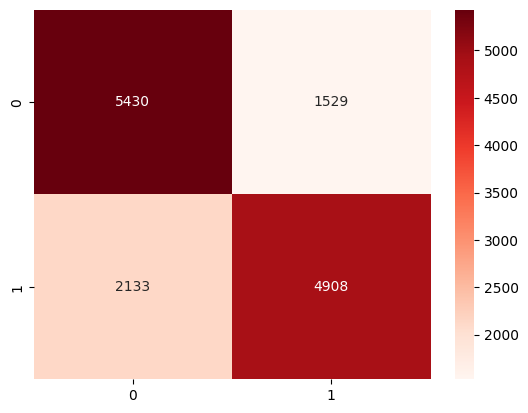

In [7]:
import seaborn as sns
from seaborn import heatmap

sns.heatmap(cm, annot=True, cmap='Reds', fmt= 'd')

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6959
           1       0.76      0.70      0.73      7041

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [10]:
import joblib
joblib.dump(model, '../SavedModels/heart_model.joblib')

['../SavedModels/heart_model.joblib']